In [88]:
import numpy as np
import pandas as pd

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split

In [201]:
df = pd.read_msgpack('data_mel.msgpack')

# df = df[df.laut.isin(['a','s','!t','!k','e','sth'])]

X = np.zeros([len(df),128])
for i in tqdm(range(len(df))):
    X[i,:] = df.mean_mfcc.values[i]
# X = ((X.T-np.mean(X,axis=1)) / np.std(X,axis=1)).T
df.head()

100%|██████████| 38250/38250 [00:00<00:00, 136592.85it/s]


,,ID,laut,mean_mfcc,modifier,n,onset_time,sex,age,emotion
0,,03a01Fa,_t,"[0.05263285119265404, 0.010375182703338105, 0....",,-1,0.080109,m,31,happiness
1,,03a01Fa,!t,"[5.598891074314904, 2.268574148781579, 2.55553...",,-1,0.119160,m,31,happiness
2,,03a01Fa,asp,"[5.598891074314904, 2.268574148781579, 2.55553...",+,-1,0.119160,m,31,happiness
3,,03a01Fa,E6,"[0.4368618855937899, 0.3983100632254428, 0.923...",,-1,0.144370,m,31,happiness
4,,03a01Fa,l,"[0.8800663433221668, 0.7052182871586671, 1.008...",,-1,0.244223,m,31,happiness


In [196]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X)
print(pca.explained_variance_ratio_)
comp = pca.transform(X)

[0.24147931 0.14965342 0.11518281 0.06826149 0.06077537 0.05417899
 0.04409645 0.03681187 0.03192379 0.02631214]


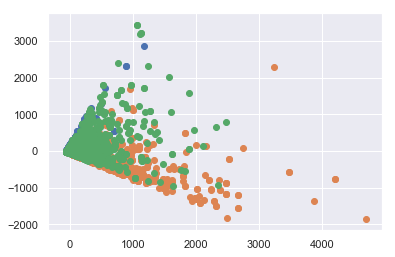

In [197]:
plt.scatter(comp[df.emotion == 'happiness',0],comp[df.emotion == 'happiness',1])
plt.scatter(comp[df.emotion == 'sadness',0],comp[df.emotion == 'sadness',1])
plt.scatter(comp[df.emotion == 'neutral',0],comp[df.emotion == 'neutral',1])

In [198]:
features = np.zeros([len(comp),11])
phonemes = df.laut.values
print(phonemes)
phoneme_map = {p: np.eye(6)[i] for i,p in enumerate(['a','s','sth','e','!t','!k'])}
for i in range(len(comp)):
    features[i,:comp.shape[1]] = comp[i,:]
    features[i,5:11] = phoneme_map[phonemes[i]]
print(features)

['_t' '!t' 'asp' ... 'N' 'sil' '.']


KeyError: '_t'

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, df.emotion, test_size=0.20)

logreg = MultinomialNB(fit_prior=False)
logreg.fit(X_train,y_train)
logreg.score(X_test,y_test)

0.24143790849673202